# Аппроксимация функции с шумом

In [31]:
import numpy as np

def f(x, a, b, c):
    return c/(1+((x-a)/b)**2)

xa = -2
xb = 2

a = 0.5
b = 1.0
c = 2.0

points = 40

xx = np.linspace(xa, xb, points)
yy = f(xx, a, b, c)

Добавлю шума ヾ(⌐■_■)ノ♪	

In [32]:
np.random.seed(1234)
noise = np.random.normal(loc = 0 , scale = 0.03, size = xx.size) 
noisy_y = yy + 10 * noise 

Теперь построю графики чистой функции и шума

<IPython.core.display.Javascript object>


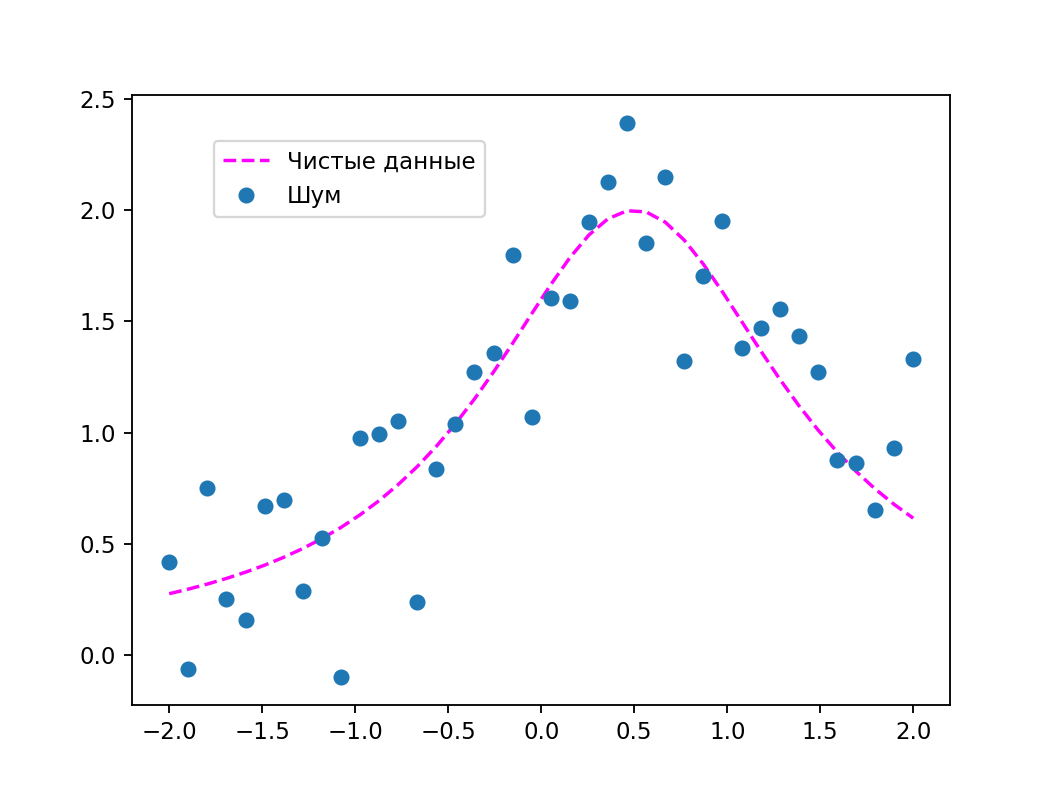

In [33]:
import matplotlib.pyplot as plt
%matplotlib notebook


plt.plot (xx, yy, '--',color = 'magenta', label = 'Чистые данные')
plt.plot (xx, noisy_y, 'o', label = 'Шум')

plt.legend (loc =(0.1, 0.8) )

Импортирую и использую аппроксимацию

In [34]:
from scipy.optimize import curve_fit

popt, pcov= curve_fit(f, xx, noisy_y)
popt

array([ 0.56884341,  1.09245214,  1.98516336])

In [35]:
pcov #дисперсия оценки параметров

array([[ 0.00367506,  0.00076174, -0.00035759],
       [ 0.00076174,  0.01037774, -0.00796847],
       [-0.00035759, -0.00796847,  0.01203068]])

Ограничу оптимизацию для лучшей подгонки:

 0 < a < 0.6 ,    0 < b < 1 ,     0 < c < 2

In [36]:
popt1, pcov1= curve_fit(f, xx, noisy_y, bounds = (0, [0.6, 1., 2.]))
popt1

array([ 0.55643404,  1.        ,  2.        ])

In [37]:
pcov1 #значения разброса уменьшились

array([[ 0.00335164,  0.00052739, -0.00028419],
       [ 0.00052739,  0.00900557, -0.00785662],
       [-0.00028419, -0.00785662,  0.013477  ]])

Судя по значениям pcov, добились лучшей аппроксимации. А теперь графики уже с оптимизацией:

<IPython.core.display.Javascript object>


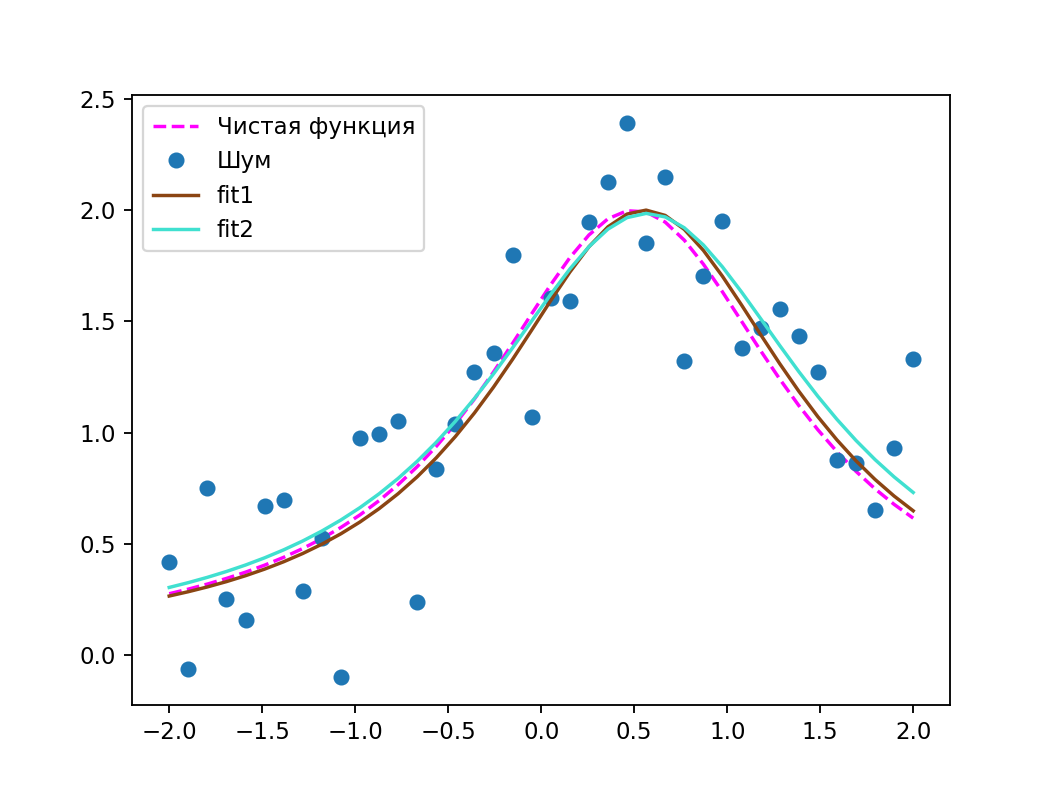

In [38]:
%matplotlib notebook

plt.plot (xx, yy, '--', color = 'magenta', label = 'Чистая функция') #чистая функция
plt.plot (xx, noisy_y, 'o', label = 'Шум') #шум 
plt.plot (xx, f(xx, *popt1), '-', color = 'saddlebrown', label = 'fit1') #оптимизация 1 
plt.plot (xx, f(xx, *popt), '-', color = 'turquoise', label = 'fit2') #оптимизация 2
plt.legend (loc ='best' )

А вот судя по графикам, лучшей оказалась первая аппроксимация. Но это лишь мой "невооруженный глаз" так видит, все числа у компьютера.